In [1]:
#!/usr/bin/env python3
import numpy as np 
import matplotlib.pylab as plt
import scipy.io.wavfile as wf
from scipy import signal
import IPython.display as ipd
#%matplotlib

In [2]:
# Funçẽs implementadas:
def signal_sampler(data, time, sample_freq, verbose=False):
    """
    Função que implementa o processo de amostragem de um sinal qualquer passado como
    parâmetro junto com seu vetor auxiliar de tempo.
    """
    # Taxa atual dos dados:
    SR = time.size/(time[-1] - time[0])
    # Instantes de amostragem:
    ts = np.linspace(time[0], time[-1], 
                     int(sample_freq*(time[-1] - time[0])), 
                     endpoint=False)
    # Vetor p/ sinal amostrado:
    sampled = np.zeros(ts.size)
    # Indices de amostragem (domínio das amostas k):
    samp_indx = ts*SR
    # Processo de amostragem:
    for i in range(ts.size):
        if i == 0:
            sampled[i] = data[i]
        else:
            sampled[i] = data[int(samp_indx[i]) - 1]
    if verbose:
        # Informações:
        print('Taxa atual dos dados:\n{}'.format(SR))
        print('Tamanho da sequência de dados:\n{}'.format(time.size))
        print('Duração:\n{}s'.format(time[-1] - time[0]))
        print('Nova taxa de amostragem:\n{}'.format(sample_freq))
        print('Novo Tamanho da sequência de dados:\n{}'.format(sampled.size))
#         print('Instantes de amostragem:\n{}, {}'.format(ts, ts.size))
#         print('Amostras coletadas:\n {}, {}'.format(samp_indx, samp_indx.size))
    return ts, sampled

# Recuperação:
# Utilizando: sicpy.signal.resample !!

Audio 1: googletradutor.wav
Taxa de amostragem: 44100 Hz
Número de amostras: 127008
Duração: 2.88

Audio 2: Lisa Gerrad - Now We Are Free.wav
Taxa de amostragem: 44100 Hz
Número de amostras: 222336
Duração: 5.0416326530612245 s


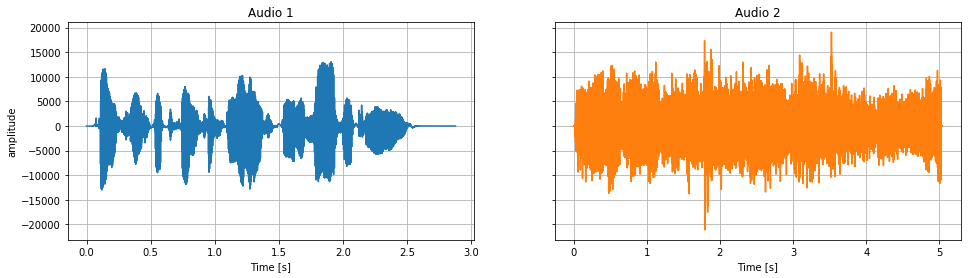

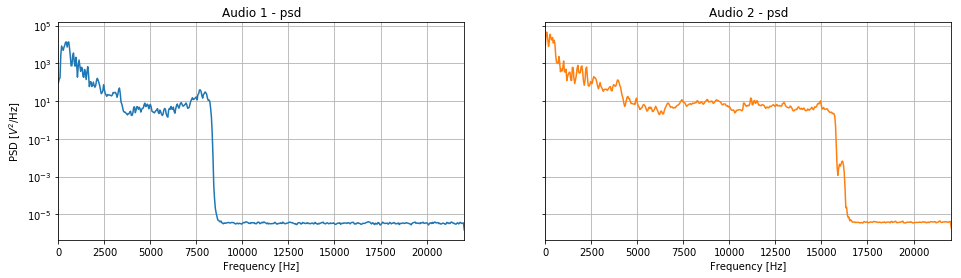


WAV format                 Min         Max    NumPy dtype
32-bit floating-point      -1.0        +1.0      float32
32-bit PCM              -2147483648 +2147483647   int32
16-bit PCM                -32768      +32767      int16
8-bit PCM                    0          255       uint8
Note that 8-bit PCM is unsigned



In [3]:
# wf.read lê os arquivos de audio, resultando, para cada um, 
# uma matriz (n, 2) onde n = número de amostras e 2 representa o numero de canais:

# Armazenando os dados e a taxa de amostragem: audio1
sr1, audio_data1 = wf.read('googletradutor_44,1khz.wav')
# Separando dados de cada canal de audio:
audio1_L = audio_data1[:, 0]
audio1_R = audio_data1[:, 1]
# Construindo vetor de tempo para representação do sinal:
time1 = np.linspace( 0, audio1_L.size/sr1, audio1_L.size)
# Armazenando os dados e a taxa de amostragem: audio 2
sr2, audio_data2 = wf.read('Lisa_Gerrard-Now_We_Are_Free_44.1khz.wav')
# Separando dados de cada canal de audio:
audio2_L = audio_data2[:, 0]
audio2_R = audio_data2[:, 1]
# Construindo vetor de tempo para representação do sinal:
time2 = np.linspace( 0, audio2_L.size/sr2, audio2_L.size)
#Signal info:
print('''Audio 1: googletradutor.wav
Taxa de amostragem: {} Hz
Número de amostras: {}
Duração: {}

Audio 2: Lisa Gerrad - Now We Are Free.wav
Taxa de amostragem: {} Hz
Número de amostras: {}
Duração: {} s'''.format(sr1, audio1_L.size, time1[-1], sr2, audio2_L.size, time2[-1]))

# Visualização do espectro:
# Psd do sinal de audio 1:
f1, P_den1 = signal.welch(audio1_L, sr1, nperseg=1024)
# Psd do sinal de audio 2:
f2, P_den2 = signal.welch(audio2_L, sr2, nperseg=1024)
# Visualização:
dim = 2.5*6.4 
fig, ax = plt.subplots(1, 2, sharex=False, 
                       sharey=True,
                       num='audio1e2', 
                       figsize=[dim, 0.25*dim])
ax[0].set_title('Audio 1')
ax[0].set_ylabel('amplitude') # Compartilhado
ax[0].set_xlabel('Time [s]')
ax[0].plot(time1, audio1_L, 'C0-')
ax[0].grid()
ax[1].set_title('Audio 2')
ax[1].set_xlabel('Time [s]')
ax[1].plot(time2, audio2_L, 'C1-')
ax[1].grid()
plt.show()
dim = 2.5*6.4 
fig, ax = plt.subplots(1, 2, sharex=False, 
                       sharey=True,
                       num='audio-freq', 
                       figsize=[dim, 0.25*dim])
ax[0].set_title('Audio 1 - psd')
ax[0].set_ylabel('PSD [$V^2$/Hz]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].semilogy(f1, P_den1)
ax[0].set_xlim(0, sr1/2)
ax[0].grid()
ax[1].set_title('Audio 2 - psd')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].semilogy(f2, P_den2, 'C1-')
ax[1].set_xlim(0, sr2/2)
ax[1].grid()
plt.show()
# WAV Info:
print("""
WAV format                 Min         Max    NumPy dtype
32-bit floating-point      -1.0        +1.0      float32
32-bit PCM              -2147483648 +2147483647   int32
16-bit PCM                -32768      +32767      int16
8-bit PCM                    0          255       uint8
Note that 8-bit PCM is unsigned
""")

In [4]:
# Reprodução:
print('Audio 1:')
ipd.Audio(data=audio1_L, rate=sr1)

Audio 1:


In [5]:
print('Audio 2:')
ipd.Audio(data=audio2_L, rate=sr2)

Audio 2:


In [6]:
# Amostragem:
# Audio 1:
sr1_new = 5000
tsa1, audio1_L_sampled = signal_sampler(audio1_L, time1, sr1_new)
print('Número de amostras do sinal 1 amostrado: {}'.format(tsa1.size))
# Audio 1:
sr2_new = 5000
tsa2, audio2_L_sampled = signal_sampler(audio2_L, time2, sr2_new)
print('Número de amostras do sinal 2 amostrado: {}'.format(tsa2.size))

Número de amostras do sinal 1 amostrado: 14400
Número de amostras do sinal 2 amostrado: 25208


In [7]:
# Reconstrução:
# Audio 1:
audio1_L_rec = signal.resample(audio1_L_sampled, time1.size)
# # Audio 2:
audio2_L_rec = signal.resample(audio2_L_sampled, time2.size)
# Erro da reconstrução:
erro1 = audio1_L - audio1_L_rec
erro2 = audio2_L - audio2_L_rec
print('Erro quadrádico médio sinal 1: {}\n' 
      'Erro quadrádico médio sinal 2: {}'.format(np.mean(erro1)**2, np.mean(erro2)**2)) 

Erro quadrádico médio sinal 1: 0.07659403150186368
Erro quadrádico médio sinal 2: 0.1677445694185485


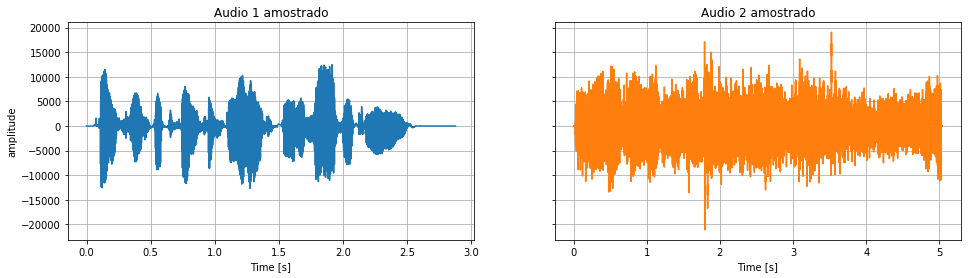

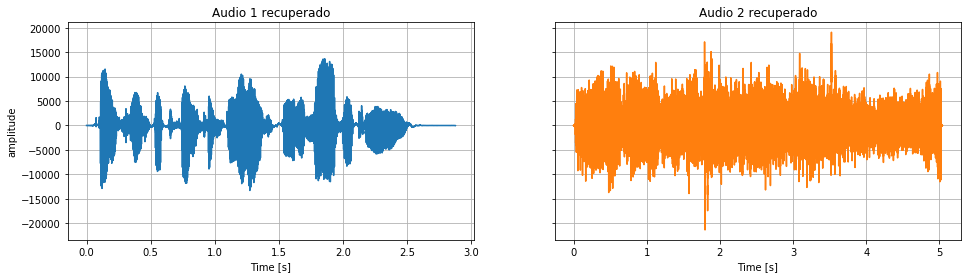

In [8]:
# Visualização do sinal amostrado e recuperado:
dim = 2.5*6.4 
fig, ax = plt.subplots(1, 2, sharex=False, 
                       sharey=True,
                       num='audio-samp', 
                       figsize=[dim, 0.25*dim])
ax[0].set_title('Audio 1 amostrado')
ax[0].set_ylabel('amplitude') # Compartilhado
ax[0].set_xlabel('Time [s]')
ax[0].plot(tsa1, audio1_L_sampled, 'C0-') #
ax[0].grid()
ax[1].set_title('Audio 2 amostrado')
ax[1].set_xlabel('Time [s]')
ax[1].plot(tsa2, audio2_L_sampled, 'C1-') #
ax[1].grid()
dim = 2.5*6.4 
fig, ax = plt.subplots(1, 2, sharex=False, 
                       sharey=True,
                       num='audio-rec', 
                       figsize=[dim, 0.25*dim])
ax[0].set_title('Audio 1 recuperado')
ax[0].set_ylabel('amplitude') # Compartilhado
ax[0].set_xlabel('Time [s]')
ax[0].plot(time1, audio1_L_rec, 'C0-') #
ax[0].grid()
ax[1].set_title('Audio 2 recuperado')
ax[1].set_xlabel('Time [s]')
ax[1].plot(time2, audio2_L_rec, 'C1-') #
ax[1].grid()
plt.show()

In [9]:
# Reprodução - sinais recuperados:
print('Audio 1 @ {}Hz - Recuperado:'.format(sr1_new))
ipd.Audio(data=audio1_L_rec, rate=sr1)

Audio 1 @ 5000Hz - Recuperado:


In [10]:
print('Audio 2 @ {} Hz - Recuperado:'.format(sr2_new))
ipd.Audio(data=audio2_L_rec, rate=sr2)

Audio 2 @ 5000 Hz - Recuperado:


In [11]:
# Adição de ruído ao sinal
sigma = 10000# Variância do ruído: 10000 e 200000
noise1 = np.random.normal(0, np.sqrt(sigma), audio1_L.size)
noise2 = np.random.normal(0, np.sqrt(sigma), audio2_L.size)
audio1_L_noise = noise1 + audio1_L
audio2_L_noise = noise2 + audio2_L
# Amostragem do sinal com ruído:
sr_rec = 25000
tsan1, audio1_L_noise_samp = signal_sampler(audio1_L_noise, time1, sr_rec)
tsan2, audio2_L_noise_samp = signal_sampler(audio2_L_noise, time2, sr_rec)
# Reconstrução:
# Audio 1:
audio1_L_noise_rec = signal.resample(audio1_L_noise_samp, time1.size)
# # Audio 2:
audio2_L_noise_rec = signal.resample(audio2_L_noise_samp, time2.size)

In [12]:
# Reprodução - sinais com ruído:
# Audio 1 + ruído
print('Audio 1 + ruído:')
ipd.Audio(data=audio1_L_noise, rate=sr1)

Audio 1 + ruído:


In [13]:
# Audio 2 + ruído
print('Audio 2 + ruído')
ipd.Audio(data=audio2_L_noise, rate=sr2)

Audio 2 + ruído


In [14]:
# Reprodução - sinais recuperados após ruído:
print('Audio 1 + ruído @ {} Hz - Recuperado:'.format(sr_rec))
ipd.Audio(data=audio1_L_noise_rec, rate=sr1)

Audio 1 + ruído @ 25000 Hz - Recuperado:


In [15]:
print('Audio 2 + ruído @ {} Hz - Recuperado:'.format(sr_rec))
ipd.Audio(data=audio2_L_noise_rec, rate=sr2)

Audio 2 + ruído @ 25000 Hz - Recuperado:


### Célula abaixo contendo códigos de teste

In [16]:
# 44100/2
# # Visualização do espectro:
# from scipy.fftpack import fft, fftfreq
# # Frequências e fft: audio 1
# freq1 = fftfreq(audio1_L.size) * sr1
# y1 = 2*np.abs(fft(audio1_L))/audio1_L.size

# # Frequências e fft: audio 2
# freq2 = fftfreq(audio2_L.size) * sr2
# y2 = 2*np.abs(fft(audio2_L))/audio2_L.size

# dim = 2.5*6.4 
# fig, ax = plt.subplots(1, 2, sharex=False, 
#                        sharey=False,
#                        num='audio1-freq', 
#                        figsize=[dim, 0.25*dim])

# ax[0].set_title('Audio 1 - fft')
# ax[0].set_xlabel('')
# ax[0].plot(freq1, y1, 'C0-')
# ax[0].set_xlim(0, sr1/2)
# ax[0].grid()

# ax[1].set_title('Audio 2 - fft')
# ax[1].set_xlabel('')
# ax[1].plot(freq2, y2, 'C1-')
# ax[1].set_xlim(0, sr2/2)
# ax[1].grid()
# plt.show()

#######################################################################################
# Selecionar as linhas e "crtl + /" para descomentar !
# Teste: 
# defino sinal
# taxa = 500
# i, f = 0, 2
# tempo = np.linspace(i, f, taxa*(f - i))
# freq_sinal = 1
# sinal=np.sin(2*np.pi*0.84*freq_sinal*tempo) + np.sin(2*np.pi*0.63*freq_sinal*tempo)
# # amostrar  na freq:
# freq_amostr = 25
# temp_amostr, amostrado = signal_sampler(sinal, tempo, freq_amostr, verbose=True)
# # Visualização
# plt.figure()
# plt.title('Demo - Sinal Amostrado')
# plt.ylabel('Amplitude')
# plt.xlabel('Time [s]')
# plt.plot(tempo, sinal, 'r--')
# plt.stem(temp_amostr, amostrado, linefmt='-C0', markerfmt='C0o', basefmt='k-')
# plt.grid()
# # Recuperando:
# plt.figure()
# # Interpolação função pronta:
# sinal_rec = signal.resample(amostrado, tempo.size)
# plt.plot(tempo, sinal, 'b')
# plt.plot(tempo, sinal_rec, 'r--')
# plt.grid()
# plt.show()